## Calefornia Housing price prediction

In [147]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


In [148]:
#importing the dataset from the sklearn dataset

from sklearn import datasets
housing_data= datasets.fetch_california_housing()


In [149]:
print(housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [150]:
housing_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [151]:
# Housing data looks like

housing_data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [152]:
#Transforming the array into a dataframe

data=pd.DataFrame(housing_data.data, columns= housing_data.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Insight: The above all are independent variable

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


Insights: 

1. total 20640 rows

2. zero null values
3. All data in numeric data type

In [154]:
# The target variable is the median house value for California districts. 
#As we have to predict the price of house, the target variable will be the dependendent variable.

target= pd.DataFrame(housing_data.target)
target.rename(columns={0:"Target"}, inplace = True)
target.head()

,Target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [155]:
#Adding the dependent variable column into all independent variable

data["Target"]= target["Target"]

## Data pre-Processing

C:\Users\vibha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\vibha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\vibha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\vibha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\vibha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\vibha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\v

<Figure size 640x480 with 0 Axes>

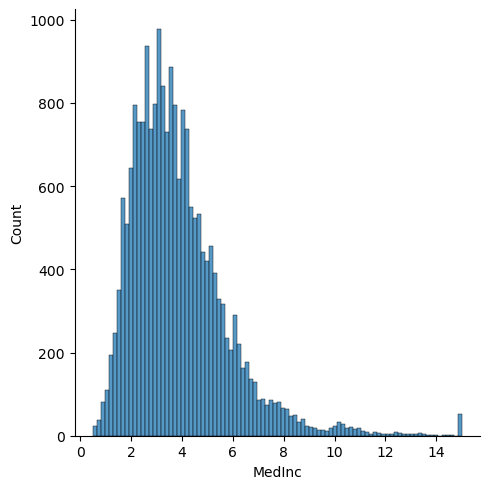

<Figure size 640x480 with 0 Axes>

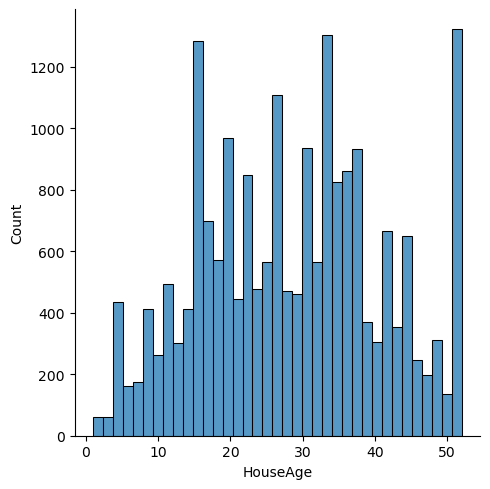

<Figure size 640x480 with 0 Axes>

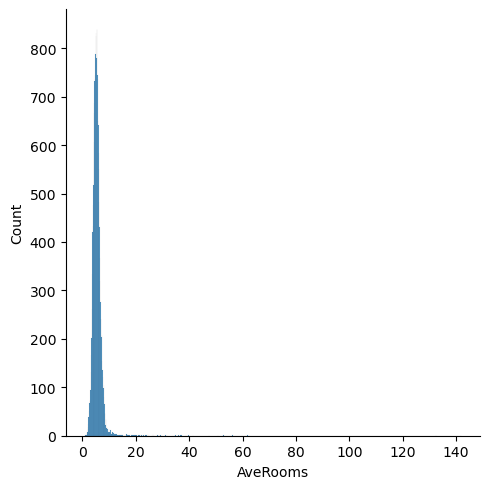

<Figure size 640x480 with 0 Axes>

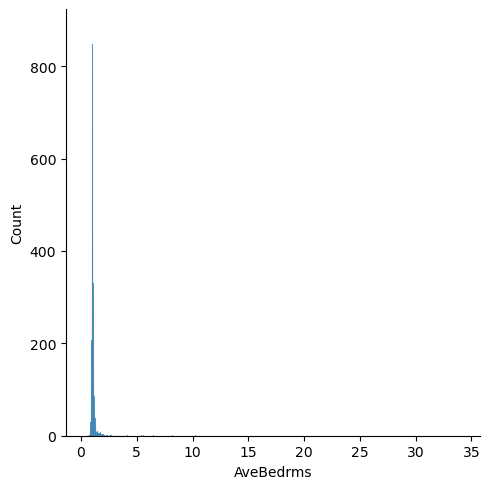

<Figure size 640x480 with 0 Axes>

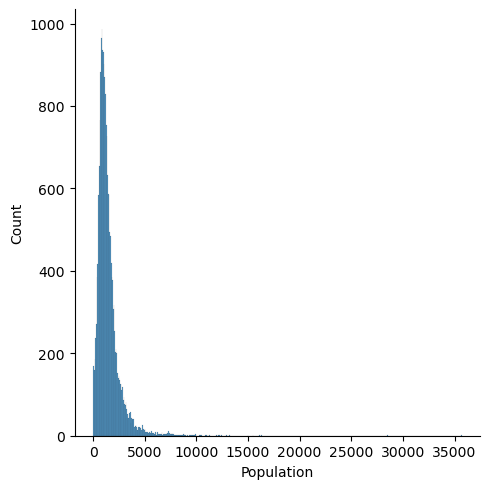

<Figure size 640x480 with 0 Axes>

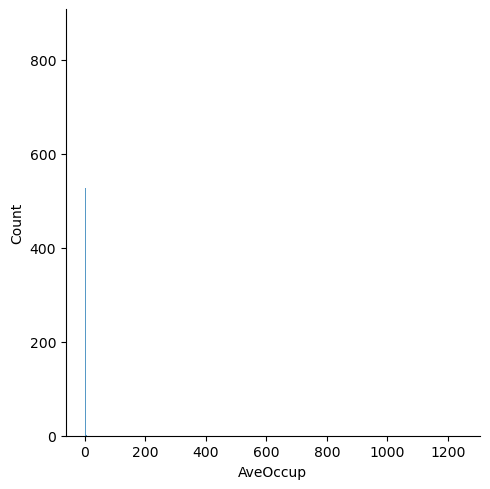

<Figure size 640x480 with 0 Axes>

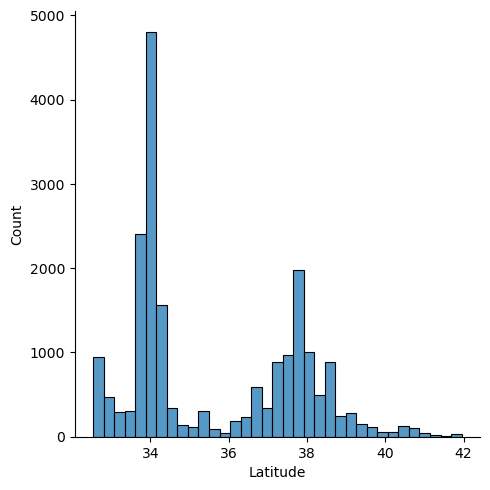

<Figure size 640x480 with 0 Axes>

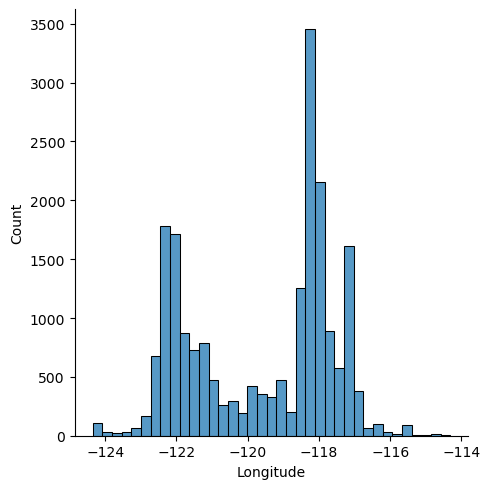

<Figure size 640x480 with 0 Axes>

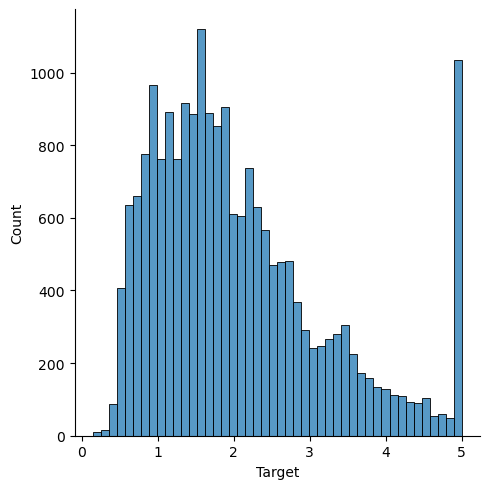

In [10]:
#Plotting the distribution plot to see the distribution of the whole data

for i in data:
    plt.figure()
    sns.displot(data[i])

We can first focus on features for which their distributions would be more or less expected.

The median income is a distribution with a long tail. It means that the salary of people is more or less normally distributed but there is some people getting a high salary.

Regarding the average house age, the distribution is more or less uniform.

The target distribution has a long tail as well. In addition, we have a threshold-effect for high-valued houses: all houses with a price above 5 are given the value 5.

Focusing on the average rooms, average bedrooms, average occupation, and population, the range of the data is large with unnoticeable bin for the largest values. It means that there are very high and few values

### Detection of Outlier

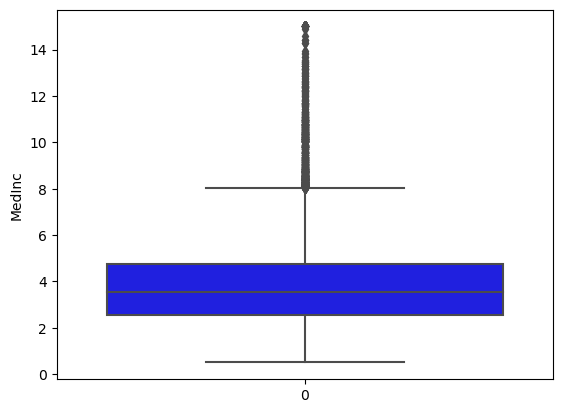

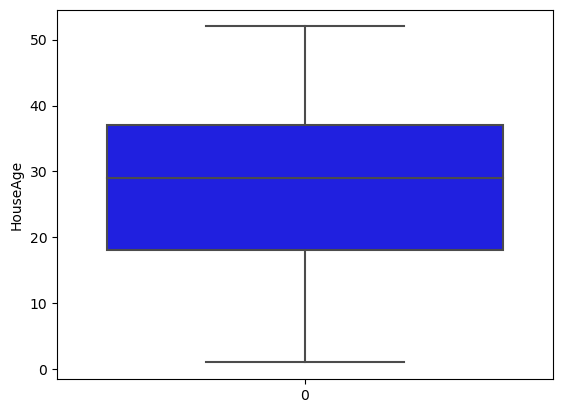

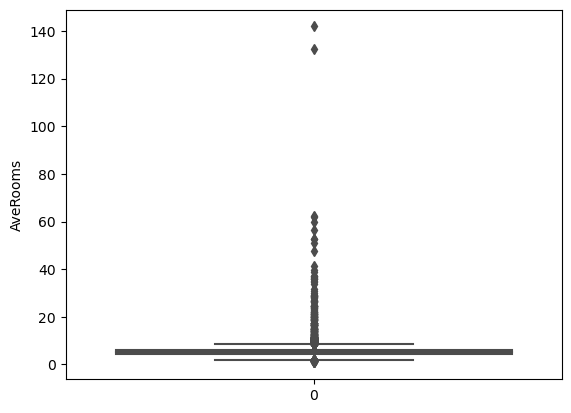

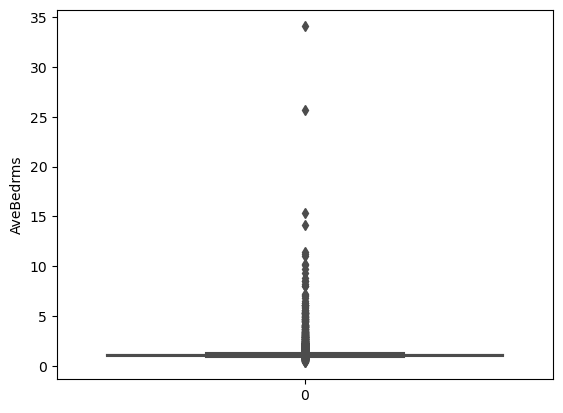

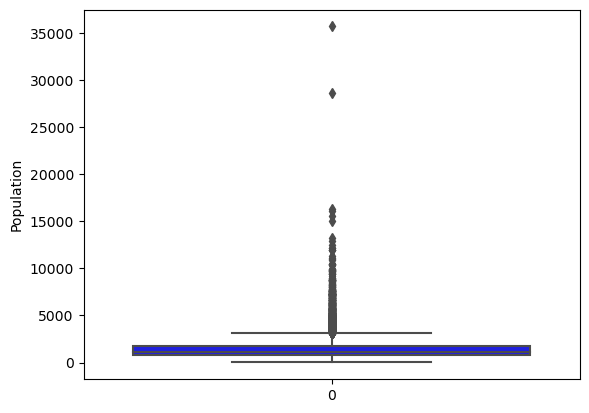

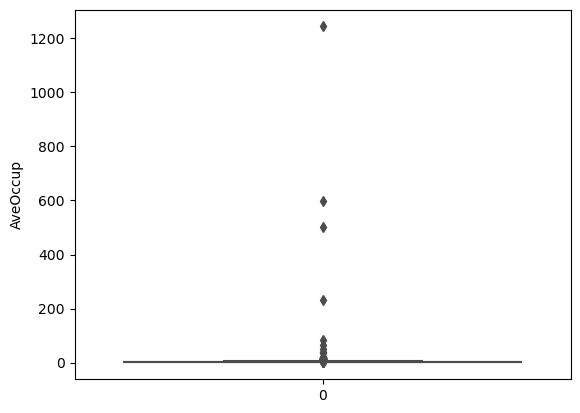

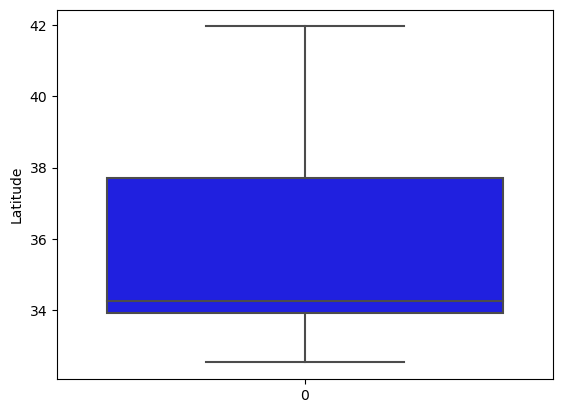

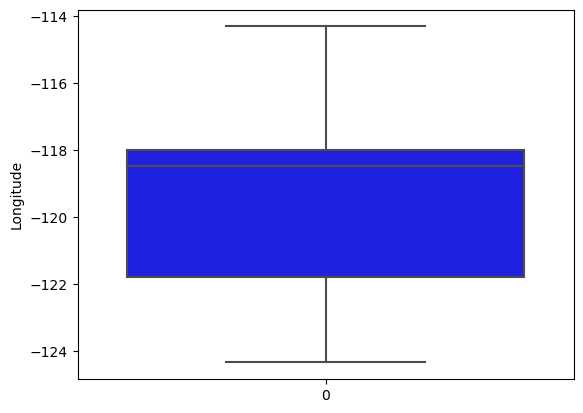

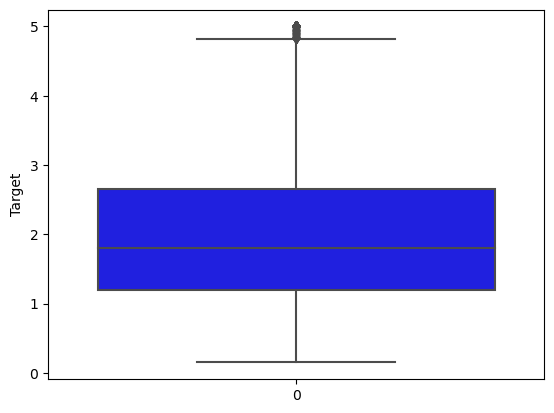

In [11]:
#Now we will check the outliers present into the setaset or not

for column in data:
    plt.figure()
    sns.boxplot(data[column], color="b")
    plt.ylabel(column)

Insight:

1. Average romms, average bedrooms, population, average occupation, and target have the outliers.
2. median income boxplot shows that some people getting very high salary

### Correlation and Multicollinearity check

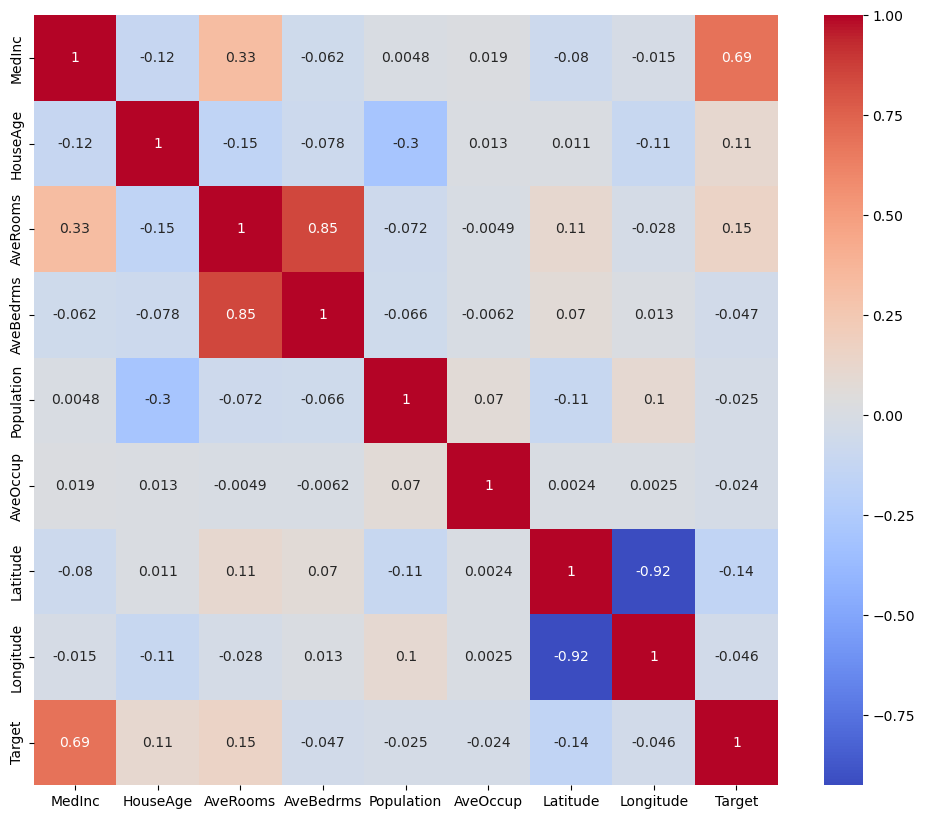

In [12]:
#Check the correlation

corr_matrix= data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot= True, cmap="coolwarm")
plt.show()

Insight:

1. Average bedrooms and average rooms are highly correlated
2. Longitude and taititude are also highly negatively correlated
3. Median of income and Target have strong correlation which is good to have 


Hence, we may choose to drop highly correlated column. But before that we need to check the multicollinearity

In [156]:
#Check the correlation with the target value

data.corr()["Target"].sort_values()

Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Target        1.000000
Name: Target, dtype: float64

Insight:
    
Here we also observed that the avg bedrooms, latitude, longitude has very low correlation with the target value. Hence, we may choose to drop these columns

In [157]:
#Multicollinearity Check:

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

vif_df = calculate_vif(data)
print(vif_df)

      Feature         VIF
0      MedInc   19.624998
1    HouseAge    7.592663
2    AveRooms   47.956351
3   AveBedrms   45.358192
4  Population    2.936078
5    AveOccup    1.099530
6    Latitude  568.497332
7   Longitude  640.064211
8      Target    9.285659


Insight:
    
VIF also indicates that the latitude, longitude ,Averagerooms, average bedrooms has very high vif.

In [158]:
#Hence, here we may drop the latitude, longitude, Average Bedrooms from the dataset

data.drop(["Latitude", "Longitude", "AveBedrms"], inplace= True, axis=1)
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Target'], dtype='object')

C:\Users\vibha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


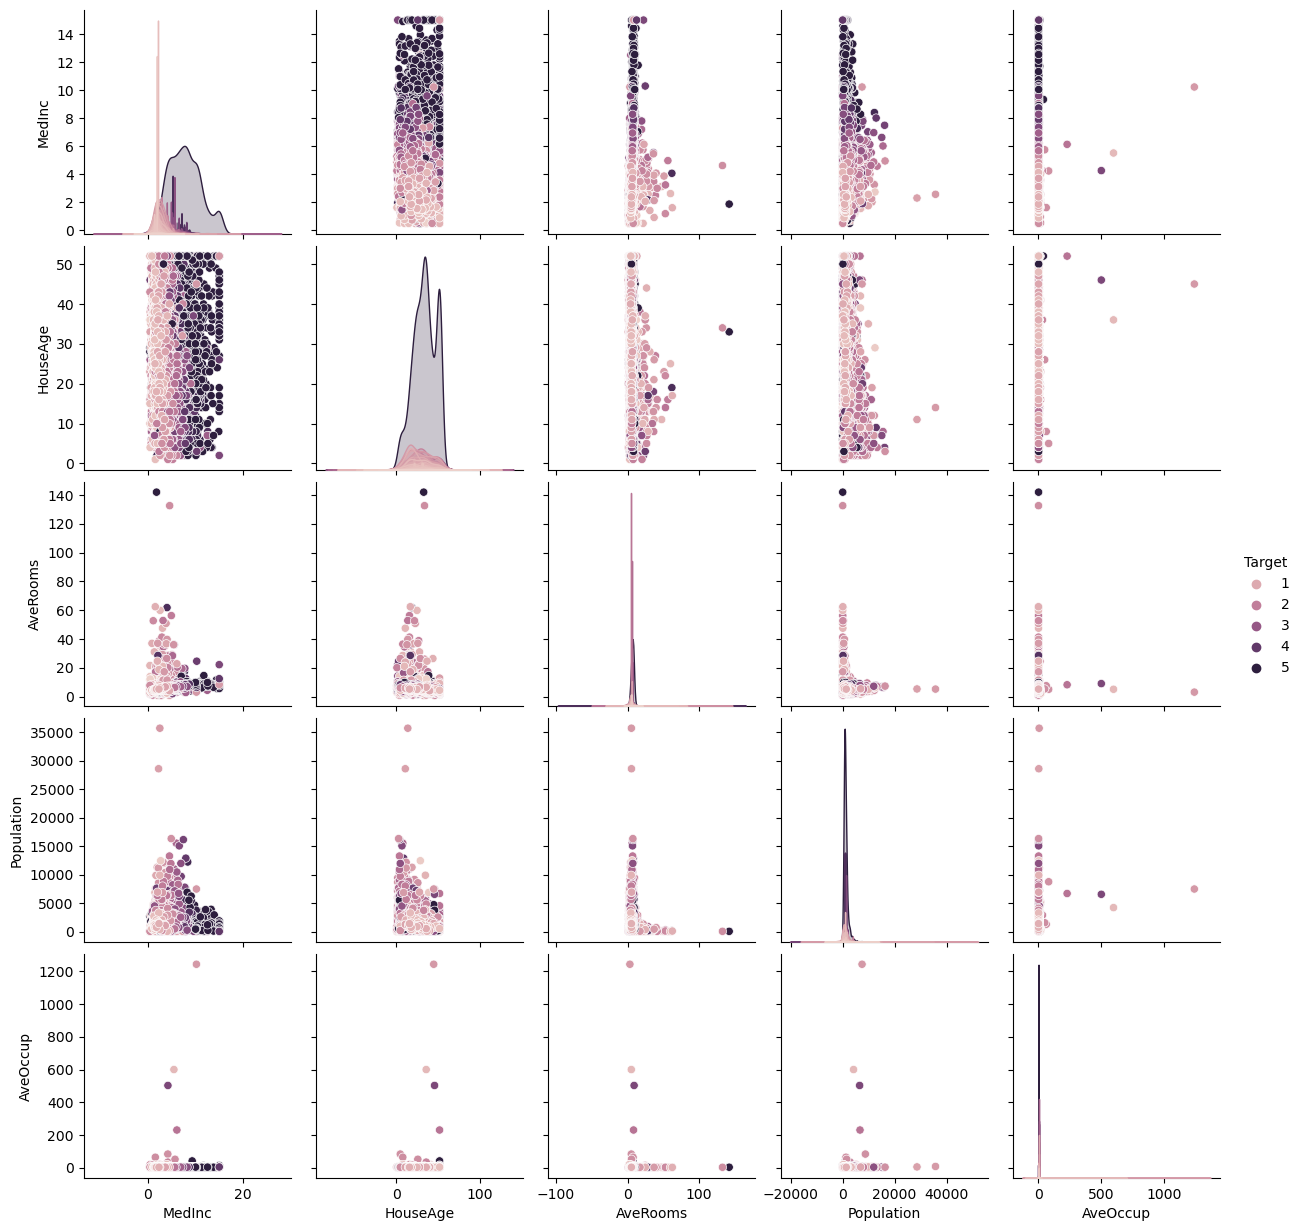

In [16]:
#Pairplot
sns.pairplot(data, hue="Target")

Insight:

While it is always complicated to interpret a pairplot since there is a lot of data, here we can get a couple of intuitions. We can confirm that some features have extreme values (outliers?). We can as well see that the median income is helpful to distinguish high-valued from low-valued houses.

  0%|                                                                             | 6/20640 [00:14<13:27:09,  2.35s/it]


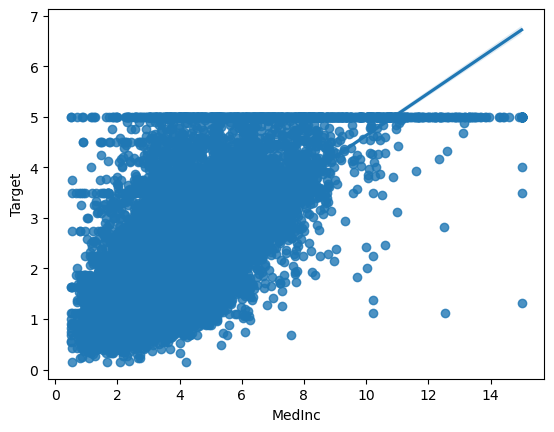

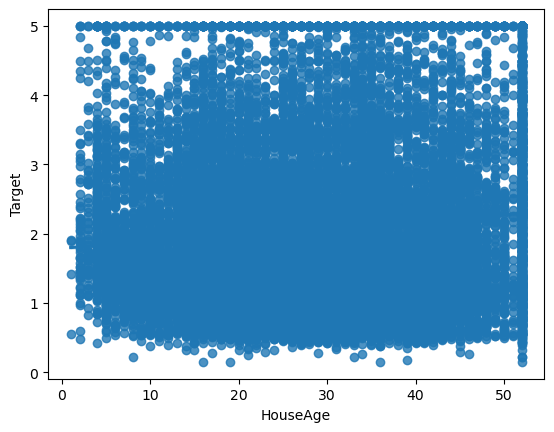

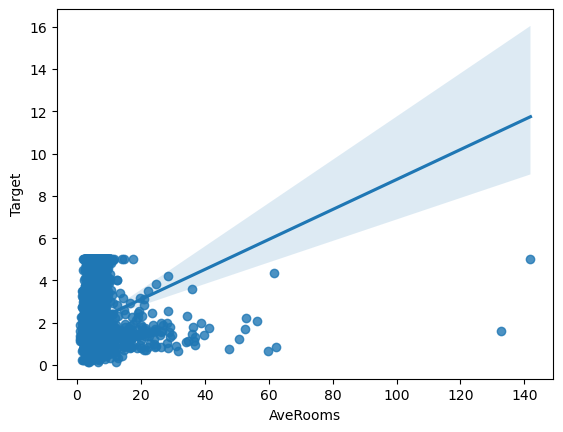

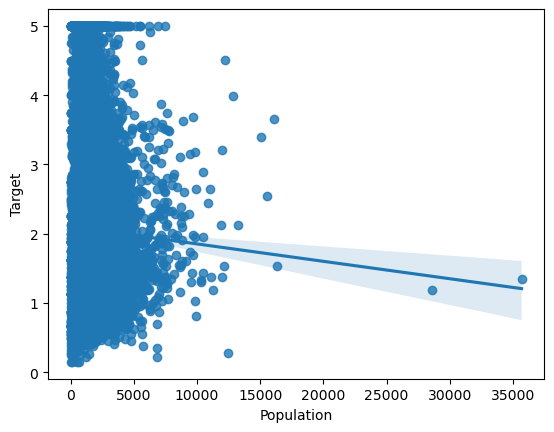

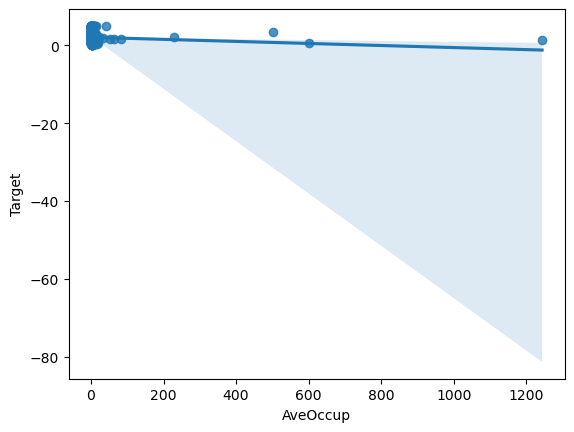

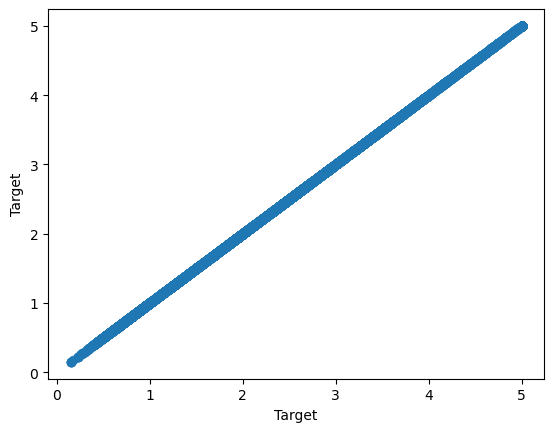

In [17]:
#Regression plot

for column in tqdm(data):
    plt.figure()
    sns.regplot(x=data[column], y=data["Target"])
    

### Removal of Outlier

In [159]:
data["z_score_MedInc"] = (data["MedInc"] - data["MedInc"].mean()) / data["MedInc"].std()
data["z_score_HouseAge"] = (data["HouseAge"] - data["HouseAge"].mean()) / data["HouseAge"].std()
data["z_score_AveRooms"] = (data["AveRooms"] - data["AveRooms"].mean()) / data["AveRooms"].std()
data["z_score_Population"] = (data["Population"] - data["Population"].mean()) / data["Population"].std()
data["z_score_AveOccup"] = (data["AveOccup"] - data["AveOccup"].mean()) / data["AveOccup"].std()

data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Target,z_score_MedInc,z_score_HouseAge,z_score_AveRooms,z_score_Population,z_score_AveOccup
0,8.3252,41.0,6.984127,322.0,2.555556,4.526,2.344709,0.982119,0.628544,-0.974405,-0.049595
1,8.3014,21.0,6.238137,2401.0,2.109842,3.585,2.332181,-0.607004,0.327033,0.861418,-0.092510
2,7.2574,52.0,8.288136,496.0,2.802260,3.521,1.782656,1.856137,1.155592,-0.820757,-0.025842
3,5.6431,52.0,5.817352,558.0,2.547945,3.413,0.932945,1.856137,0.156962,-0.766010,-0.050328
4,3.8462,52.0,6.281853,565.0,2.181467,3.422,-0.012881,1.856137,0.344702,-0.759828,-0.085614
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,0.781,-1.216099,-0.289180,-0.155020,-0.512579,-0.049109
20636,2.5568,18.0,6.114035,356.0,3.122807,0.771,-0.691576,-0.845373,0.276874,-0.944382,0.005021
20637,1.7000,17.0,5.205543,1007.0,2.325635,0.923,-1.142566,-0.924829,-0.090316,-0.369528,-0.071733
20638,1.8672,18.0,5.329513,741.0,2.123209,0.847,-1.054557,-0.845373,-0.040210,-0.604415,-0.091223


In [160]:
data["z_score_MedInc_val"] =list(map(lambda x: "F" if x>=2.5 or x<-2.5 else "T" , data["z_score_MedInc"]))
data["z_score_HouseAge_val"] = list(map(lambda x: "F" if x>=2.5 or x<-2.5 else "T" , data["z_score_HouseAge"] ))
data["z_score_AveRooms_val"] = list(map(lambda x: "F" if x>=2.5 or x<-2.5 else "T" , data["z_score_AveRooms"] ))
data["z_score_Population_val"] = list(map(lambda x: "F" if x>=2.5 or x<-2.5 else "T" , data["z_score_Population"] ))
data["z_score_AveOccup_val"] = list(map(lambda x: "F" if x>=2.5 or x<-2.5 else "T" , data["z_score_AveOccup"] ))


In [161]:
data_clean= data.loc[(data["z_score_HouseAge_val"]=="T") & (data["z_score_AveRooms_val"]=="T") & (data["z_score_Population_val"]=="T") & (data["z_score_AveOccup_val"]) & (data["z_score_AveOccup_val"])]

In [162]:
print("Erlier data:", data.shape)
print(" ")
print("************************************")
print("")
print("After data:", data_clean.shape)

Erlier data: (20640, 16)
 
************************************

After data: (19987, 16)


In [163]:
data_clean["Target"].value_counts()

Target
5.00001    950
1.37500    117
1.62500    110
1.12500    102
1.87500     90
          ... 
4.87200      1
2.90200      1
0.39800      1
4.39000      1
0.47000      1
Name: count, Length: 3822, dtype: int64

In [164]:
#Now the data free from outlier and we may build the model now

data_clean=data_clean[["MedInc", "HouseAge", "AveRooms", "Population", "AveOccup", "Target" ]]

In [165]:
X= data_clean.drop("Target", axis=1) #All independent variable
Y= data_clean["Target"] #Dependent variable

In [166]:
Y= pd.DataFrame(Y)

In [167]:
#Train test split of the dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y , random_state= 42, test_size=0.25)

In [168]:
#Standaridazation of the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Linear Regression Model

In [169]:
#Model Building

lr_reg = LinearRegression(fit_intercept= True)
lr_reg.fit(X_train_scaled, Y_train)

LinearRegression()

In [170]:
#Coefficient of the parameters

coeff= pd.DataFrame(lr_reg.coef_).T
coeff.rename(columns={0:"Coefficient"}, inplace=True)

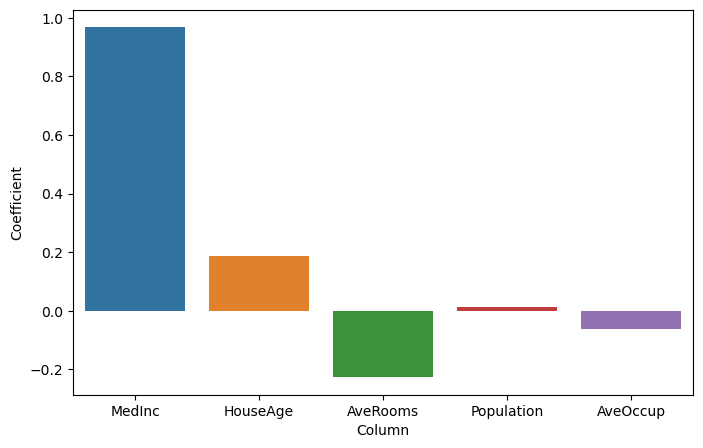

In [171]:
coeff["Column"]= X_train.columns

plt.figure(figsize=(8,5))
sns.barplot(y=coeff["Coefficient"], x=coeff["Column"])
plt.show()

Insight:
    
1. Median of income has highest cofficient value

In [172]:
print("Linear intercept is {}". format(lr_reg.intercept_))

Linear intercept is [2.07275772]


In [173]:
Y_train_pred= lr_reg.predict(X_train_scaled)

#plt.scatter(Y_train, Y_train_pred,)

#R2 score (Model Fittness)

print("Model R2 score is {}". format(metrics.r2_score(Y_train, Y_train_pred)))
print("Model RMSE is {}". format(np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred))))

Model R2 score is 0.5307604788908782
Model RMSE is 0.795483611297567


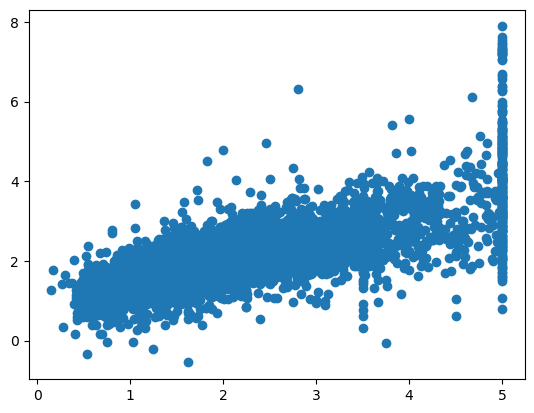

In [174]:
# Prediction for the test data set

Y_pred= lr_reg.predict(X_test_scaled)

plt.scatter(Y_test, Y_pred,)

Insight: Less scatter more accurate

In [175]:
#R2 score (Model Fittness)

print("Model R2 score is {}". format(metrics.r2_score(Y_test, Y_pred)))

Model R2 score is 0.5409276552563586


In [176]:
#MSE for the model

print("Model MSE is {}". format(metrics.mean_squared_error(Y_test, Y_pred)))

Model MSE is 0.6151475513609052


In [177]:
#RMSE of the model

print("Model RMSE is {}". format(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))

Model RMSE is 0.7843134267376182


### Use Regularization

#### 1. Ridge

In [178]:
#We can use regularization to get better result

model_ridge= Ridge(alpha=1)
model_ridge.fit(X_train_scaled, Y_train)

Ridge(alpha=1)

<Axes: ylabel='Coefficient'>

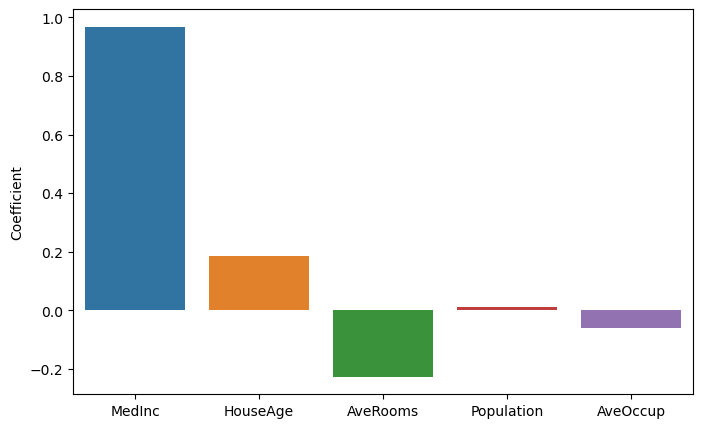

In [179]:
coeff= pd.DataFrame(model_ridge.coef_).T
coeff.rename(columns={0:"Coefficient"}, inplace=True)

plt.figure(figsize=(8,5))
sns.barplot(y=coeff["Coefficient"], x= X_train.columns)

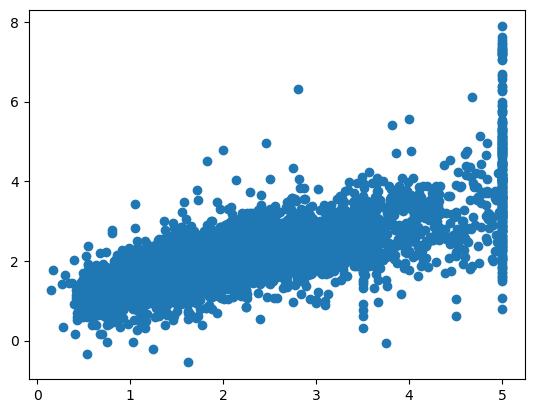

In [180]:
Y_pred= model_ridge.predict(X_test_scaled)
plt.scatter(Y_test, Y_pred)

In [181]:
#R2 score (Model Fittness)

print("Model R2 score is {}". format(metrics.r2_score(Y_test, Y_pred)))

#MSE for the model

print("Model MSE is {}". format(metrics.mean_squared_error(Y_test, Y_pred)))

#RMSE of the model

print("Model RMSE is {}". format(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))

Model R2 score is 0.5409315317874464
Model MSE is 0.6151423568885444
Model RMSE is 0.784310115253236


#### 2. Lasso

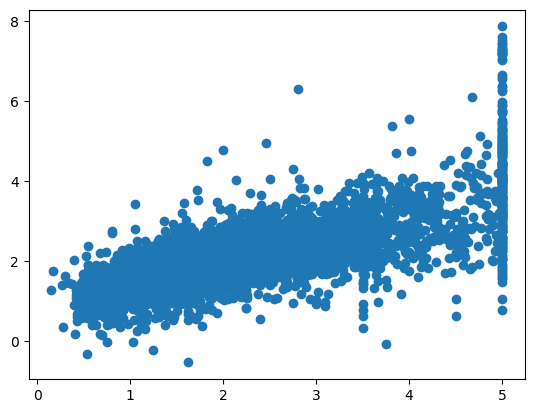

In [182]:
model_lasso= Lasso(alpha=0.001)
model_lasso.fit(X_train_scaled, Y_train)


Y_pred= model_lasso.predict(X_test_scaled)
plt.scatter(Y_test, Y_pred)

<Axes: ylabel='Coefficient'>

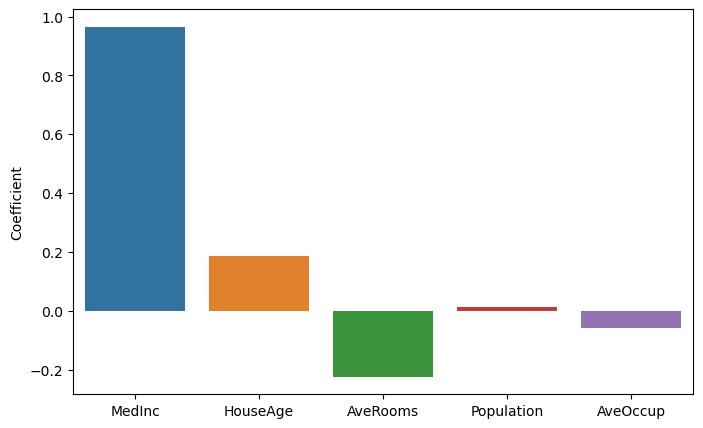

In [183]:
coeff= pd.DataFrame(model_lasso.coef_)
coeff.rename(columns={0:"Coefficient"}, inplace=True)

plt.figure(figsize=(8,5))
sns.barplot(y=coeff["Coefficient"], x= X_train.columns)

In [184]:
#R2 score (Model Fittness)

print("Model R2 score is {}". format(metrics.r2_score(Y_test, Y_pred)))

#MSE for the model

print("Model MSE is {}". format(metrics.mean_squared_error(Y_test, Y_pred)))

#RMSE of the model

print("Model RMSE is {}". format(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))

Model R2 score is 0.5409094187824643
Model MSE is 0.6151719878628855
Model RMSE is 0.7843290048588574


### Decission Tree Model

In [190]:
#Using grid search CV for best parameter for decision tree

dt= DecisionTreeRegressor(random_state=5)
params= [{'max_depth':[4,8,12,16,20, 24,28,32,36,40,44,48,52], "max_leaf_nodes":range(2,52)}]
grid= GridSearchCV(dt, param_grid=params, refit=True)

In [191]:
grid.fit(X_train_scaled, Y_train)
grid_predictions= grid.predict(X_test_scaled)

print('Accuracy Score:{}'.format(metrics.r2_score(Y_test, grid_predictions)))

Accuracy Score:0.6355124119084428


The accuracy with decission tree has been improved 